In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

df = df.rename(columns={'v1': 'labels', 'v2': 'data'})

df['labels'] = df['labels'].apply(lambda x: 0 if x == 'ham' else 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['labels'], test_size=0.2)

In [5]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [6]:
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
modelNB.score(X_test, y_test)

0.9596412556053812

In [7]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9479820627802691

SPAM:


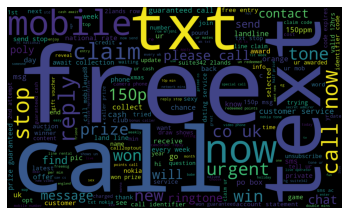

HAM:


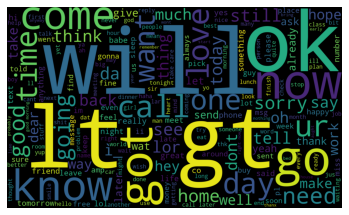

########## MultinomialNB ##########
sneaky_spam
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg W

In [20]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=2000, height=1200).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print('SPAM:')
visualize(1)
print('HAM:')
visualize(0)

print('########## MultinomialNB ##########')
# 找出判斷錯誤的地方
X = vectorizer.transform(df['data'])
df['predictions'] = modelNB.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['labels'] == 1)]['data']
print('sneaky_spam')
print('==============================')
if len(sneaky_spam) > 10:
    for msg in sneaky_spam[:10]:
        print(msg)
else:
    pass

# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['labels'] == 0)]['data']
print('\nnot_actually_spam')
print('==============================')
if len(not_actually_spam) > 10:
    for msg in not_actually_spam[:10]:
        print(msg)
else:
    pass


print('########## DecisionTreeClassifier ##########')
# 找出判斷錯誤的地方
X = vectorizer.transform(df['data'])
df['predictions'] = tree.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['labels'] == 1)]['data']
print('sneaky_spam')
print('==============================')
if len(sneaky_spam) > 10:
    for msg in sneaky_spam[:10]:
        print(msg)
else:
    pass

# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['labels'] == 0)]['data']
print('\nnot_actually_spam')
print('==============================')
if len(not_actually_spam) > 10:
    for msg in not_actually_spam[:10]:
        print(msg)
else:
    pass